# Simple multiclass non-linear ML supervised task

In [1]:
import sys
sys.path.insert(0,'../')

In [2]:
from matplotlib import pyplot as plt
import pandas as pd

import tensorflow
from tensorflow.keras import layers, models
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from decentralized_smart_grid_ml.federated_learning import models_reader_writer

2021-12-19 16:39:07.803216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-19 16:39:07.803250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
plt.style.use('seaborn')

First of all, we generate a linear separable dataset

In [4]:
# constants
n_samples = 5000
n_classes = 3
n_features = 2
seed = 2
epochs = 2
test_size = 0.2
TASK_PATH = "../data_sample/simple_multiclass_task/" 

In [5]:
x, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=n_features, cluster_std=2, random_state=seed)

Plot the dataset

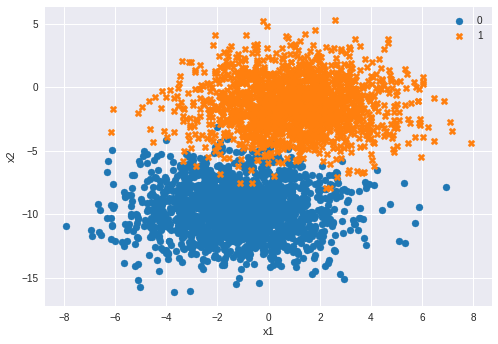

In [6]:
plt.scatter(x[:, 0][y == 0], x[:, 1][y == 0], color='tab:blue', marker='o', label="0")
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='tab:orange', marker='X', label="1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

Save the dataset in a csv

In [7]:
database_path = TASK_PATH + "simple_multiclass_task.csv"

In [8]:
one_hot_y = to_categorical(y)

In [9]:
df_dataset = pd.DataFrame({"x1": x[:, 0], "x2": x[:, 1]})
for idx_class in range(3):
    df_dataset["is_" + str(idx_class)] = [int(one_hot_y_i[idx_class]) for one_hot_y_i in one_hot_y]
display(df_dataset.head())
df_dataset.to_csv(database_path, index=False)

x1         x2  is_0  is_1  is_2
0 -5.192085  -4.290355     0     0     1
1 -2.933520  -5.332270     0     0     1
2 -0.514217  -2.610752     0     1     0
3  0.471494  -1.788497     0     1     0
4 -1.295304 -11.349137     1     0     0

Split the whole dataset in train and test sets

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, one_hot_y, test_size=test_size, random_state=seed)

Train a simple linear classifier

In [11]:
# define model
model = models.Sequential()
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2021-12-19 16:39:10.781982: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-19 16:39:10.782054: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-19 16:39:10.782101: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Lenovo-ideapad): /proc/driver/nvidia/version does not exist
2021-12-19 16:39:10.782495: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.fit(x_train, y_train, epochs=2)

Epoch 1/2
125/125 [==============================] - 1s 2ms/step - loss: 0.8631 - accuracy: 0.5505
Epoch 2/2
125/125 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7160


In [13]:
print("Train evaluation")
metrics_train = model.evaluate(x_train, y_train)
print("Test evaluation")
metrics_test = model.evaluate(x_test, y_test)

Train evaluation
125/125 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.7355
Test evaluation
32/32 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7380
